# Imports

In [90]:
import pandas as pd
import seaborn as sns
from owlready2 import get_ontology, Thing
import matplotlib.pyplot as plt
import copy
import numpy as np
from adjustText import adjust_text

# Get the data from the CoDex


In [91]:
tutorials_url = "https://raw.githubusercontent.com/galaxyproject/galaxy_codex/main/results/microgalaxy/tutorials.tsv"

In [92]:
df = pd.read_csv(tutorials_url, sep="\t")
print(df.columns)
df = df.drop_duplicates(keep="last")
#df.head()
print(df)

Index(['Topic', 'Title', 'Link', 'EDAM topic', 'EDAM operation', 'Creation',
       'Last modification', 'Version', 'Tutorial', 'Slides', 'Video',
       'Workflows', 'Tools', 'Servers with precise tool versions',
       'Servers with tool but different versions', 'Feedback number',
       'Feedback mean note', 'Visitors', 'Page views', 'Visit duration',
       'Video views'],
      dtype='object')
                Topic                                              Title  \
1            Assembly            Assembly of metagenomic sequencing data   
2            Assembly  Genome Assembly of a bacterial genome (MRSA) s...   
4            Assembly                                 Unicycler Assembly   
5             Ecology  Checking expected species and contamination in...   
8   Genome Annotation                      Genome annotation with Prokka   
11  Genome Annotation  Refining Genome Annotations with Apollo (proka...   
12  Genome Annotation   Comparative gene analysis in unannotated g

# Create new rows, one row for each EDAM term per tool - to allow to visualize tools that are in multiple terms
# EDAM Operations

In [93]:
inflated_tools_operation = []
for idx, row in df.iterrows():
    terms = row["EDAM operation"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM operation single"] = val
            inflated_tools_operation.append(row_c)
    else:
        row_c = copy.copy(row_d)
        row_c["EDAM operation single"] = "Undefined"
        inflated_tools_operation.append(row_c)

df_inflated_operation = pd.DataFrame(inflated_tools_operation)

# Minimize data for plotting
value_counts = df_inflated_operation["EDAM operation single"].value_counts()
values = value_counts[(value_counts >= 5)]
df_inflated_mod_operation = df_inflated_operation.copy()
df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(values.index), "EDAM operation single"] = "Other Operation"

# Split data for plotting
df_inflated_mod1_operation = df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(["Undefined","Other Operation"])]
df_inflated_mod2_operation = df_inflated_mod_operation.loc[df_inflated_mod_operation["EDAM operation single"].isin(["Undefined","Other Operation"])]

df_inflated_operation.head()

,Topic,Title,Link,EDAM topic,EDAM operation,Creation,Last modification,Version,Tutorial,Slides,...,Tools,Servers with precise tool versions,Servers with tool but different versions,Feedback number,Feedback mean note,Visitors,Page views,Visit duration,Video views,EDAM operation single
0,Assembly,Assembly of metagenomic sequencing data,https://training.galaxyproject.org//topics/ass...,"Metagenomics, Sequence assembly","Sequence composition calculation, Genome assem...",2024-06-24,2024-06-24,0,True,False,...,"filter_tabular, bandage_image, metaspades, meg...",NaN,"UseGalaxy.cz, UseGalaxy.eu",0,NaN,1,1,0.0,0,Sequence composition calculation
1,Assembly,Assembly of metagenomic sequencing data,https://training.galaxyproject.org//topics/ass...,"Metagenomics, Sequence assembly","Sequence composition calculation, Genome assem...",2024-06-24,2024-06-24,0,True,False,...,"filter_tabular, bandage_image, metaspades, meg...",NaN,"UseGalaxy.cz, UseGalaxy.eu",0,NaN,1,1,0.0,0,Genome assembly
2,Assembly,Assembly of metagenomic sequencing data,https://training.galaxyproject.org//topics/ass...,"Metagenomics, Sequence assembly","Sequence composition calculation, Genome assem...",2024-06-24,2024-06-24,0,True,False,...,"filter_tabular, bandage_image, metaspades, meg...",NaN,"UseGalaxy.cz, UseGalaxy.eu",0,NaN,1,1,0.0,0,Visualisation
3,Assembly,Assembly of metagenomic sequencing data,https://training.galaxyproject.org//topics/ass...,"Metagenomics, Sequence assembly","Sequence composition calculation, Genome assem...",2024-06-24,2024-06-24,0,True,False,...,"filter_tabular, bandage_image, metaspades, meg...",NaN,"UseGalaxy.cz, UseGalaxy.eu",0,NaN,1,1,0.0,0,Primer removal
4,Assembly,Assembly of metagenomic sequencing data,https://training.galaxyproject.org//topics/ass...,"Metagenomics, Sequence assembly","Sequence composition calculation, Genome assem...",2024-06-24,2024-06-24,0,True,False,...,"filter_tabular, bandage_image, metaspades, meg...",NaN,"UseGalaxy.cz, UseGalaxy.eu",0,NaN,1,1,0.0,0,Sequence assembly visualisation


# Process EDAM topics

In [94]:
inflated_tools_topics = []
for idx, row in df.iterrows():
    terms = row["EDAM topic"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM topic single"] = val
            inflated_tools_topics.append(row_c)
    else:
        row_c = copy.copy(row_d)
        row_c["EDAM topic single"] = "Undefined"
        inflated_tools_topics.append(row_c)

df_inflated_topics = pd.DataFrame(inflated_tools_topics)

# Minimize data for plotting
value_counts = df_inflated_topics["EDAM topic single"].value_counts()
values = value_counts[(value_counts >= 5)]
df_inflated_mod_topics = df_inflated_topics.copy()
df_inflated_mod_topics.loc[~df_inflated_mod_topics["EDAM topic single"].isin(values.index), "EDAM topic single"] = "Other Topic"

# Split data for plotting
df_inflated_mod1_topic = df_inflated_mod_topics.loc[~df_inflated_mod_topics["EDAM topic single"].isin(["Undefined","Other Topic"])]
df_inflated_mod2_topic = df_inflated_mod_topics.loc[df_inflated_mod_topics["EDAM topic single"].isin(["Undefined"])]

df_inflated_topics.head()

,Topic,Title,Link,EDAM topic,EDAM operation,Creation,Last modification,Version,Tutorial,Slides,...,Tools,Servers with precise tool versions,Servers with tool but different versions,Feedback number,Feedback mean note,Visitors,Page views,Visit duration,Video views,EDAM topic single
0,Assembly,Assembly of metagenomic sequencing data,https://training.galaxyproject.org//topics/ass...,"Metagenomics, Sequence assembly","Sequence composition calculation, Genome assem...",2024-06-24,2024-06-24,0,True,False,...,"filter_tabular, bandage_image, metaspades, meg...",NaN,"UseGalaxy.cz, UseGalaxy.eu",0,NaN,1,1,0.000000,0,Metagenomics
1,Assembly,Assembly of metagenomic sequencing data,https://training.galaxyproject.org//topics/ass...,"Metagenomics, Sequence assembly","Sequence composition calculation, Genome assem...",2024-06-24,2024-06-24,0,True,False,...,"filter_tabular, bandage_image, metaspades, meg...",NaN,"UseGalaxy.cz, UseGalaxy.eu",0,NaN,1,1,0.000000,0,Sequence assembly
2,Assembly,Genome Assembly of a bacterial genome (MRSA) s...,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Whole genome sequencing, Pu...","Sequence assembly visualisation, Sequence comp...",2021-03-24,2024-03-11,28,True,False,...,"bandage_image, upload1, quast, bandage_info, f...","UseGalaxy.cz, UseGalaxy.eu, UseGalaxy.fr, UseG...","Galaxy@AuBi, GalaxyTrakr, UseGalaxy.no",8,4.5,6115,9890,3.733333,0,Sequence assembly
3,Assembly,Genome Assembly of a bacterial genome (MRSA) s...,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Whole genome sequencing, Pu...","Sequence assembly visualisation, Sequence comp...",2021-03-24,2024-03-11,28,True,False,...,"bandage_image, upload1, quast, bandage_info, f...","UseGalaxy.cz, UseGalaxy.eu, UseGalaxy.fr, UseG...","Galaxy@AuBi, GalaxyTrakr, UseGalaxy.no",8,4.5,6115,9890,3.733333,0,Whole genome sequencing
4,Assembly,Genome Assembly of a bacterial genome (MRSA) s...,https://training.galaxyproject.org//topics/ass...,"Sequence assembly, Whole genome sequencing, Pu...","Sequence assembly visualisation, Sequence comp...",2021-03-24,2024-03-11,28,True,False,...,"bandage_image, upload1, quast, bandage_info, f...","UseGalaxy.cz, UseGalaxy.eu, UseGalaxy.fr, UseG...","Galaxy@AuBi, GalaxyTrakr, UseGalaxy.no",8,4.5,6115,9890,3.733333,0,Public health and epidemiology


# Plot EDAM operations

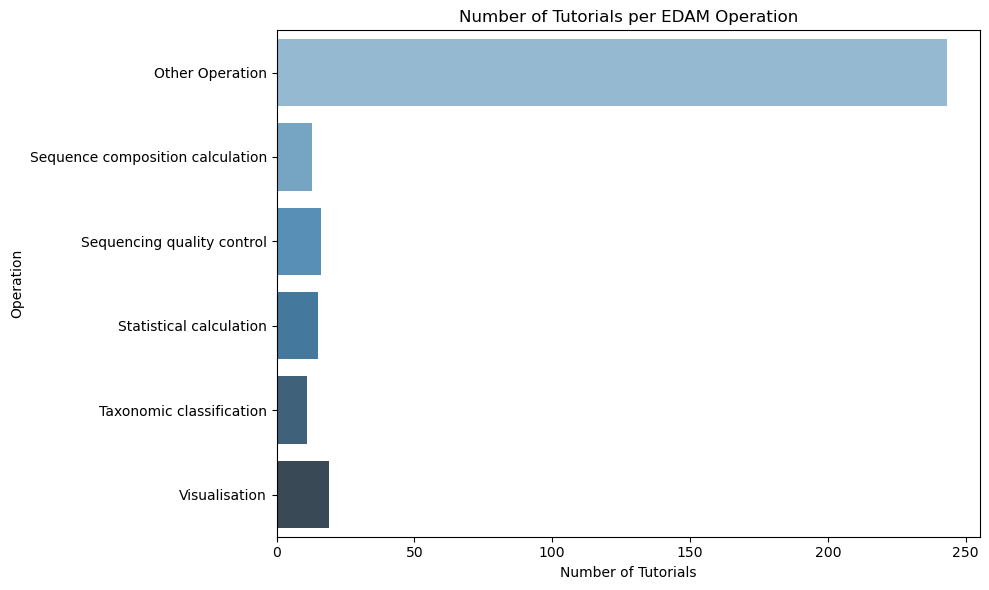

In [80]:
edam_operation_tutorials = df_inflated_mod_operation.groupby('EDAM operation single').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=edam_operation_tutorials, x='Count', y='EDAM operation single', palette='Blues_d')
plt.title('Number of Tutorials per EDAM Operation')
plt.xlabel('Number of Tutorials')
plt.ylabel('Operation')
plt.tight_layout()
plt.savefig("../results/edam_operation_tutorials.png")
plt.show()

/tmp/ipykernel_114596/84778509.py:11: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax2 = sns.scatterplot(data=df_inflated_mod2_operation,


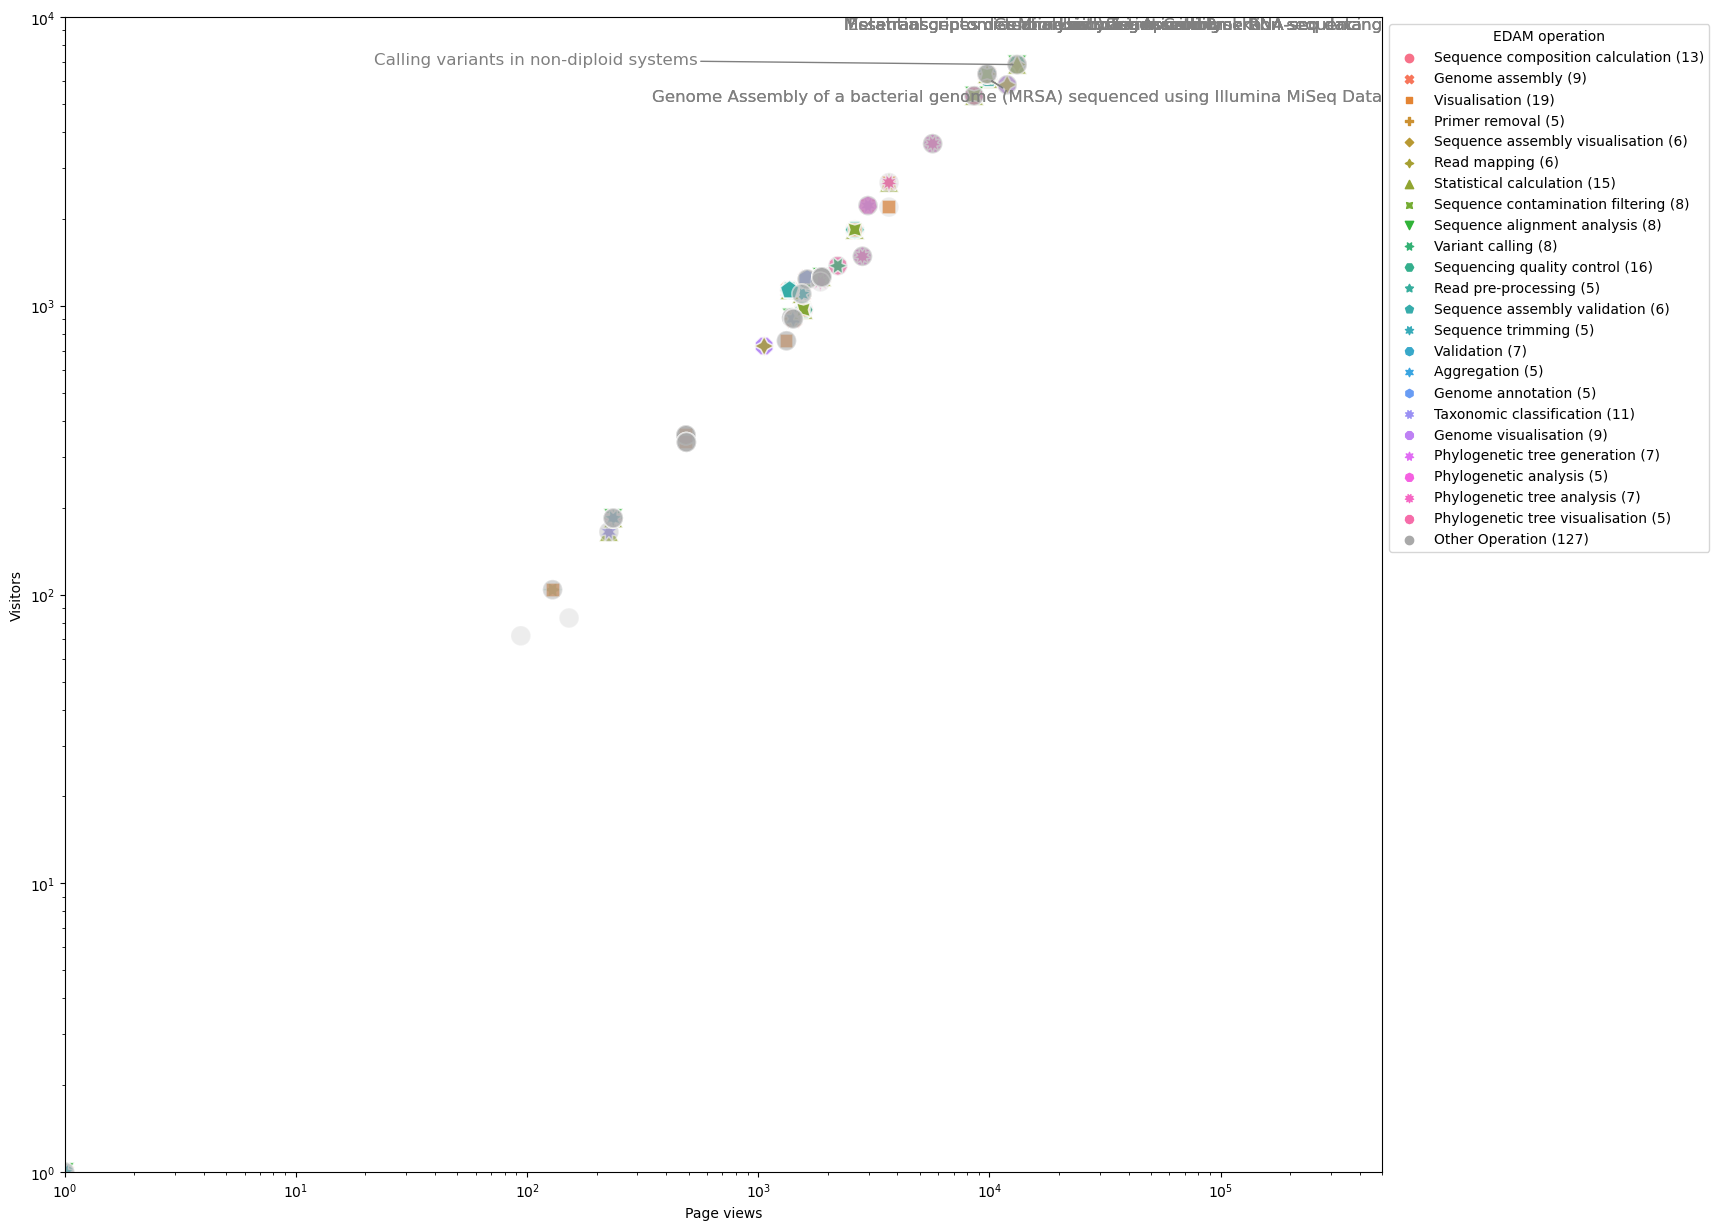

In [95]:
plt.figure(figsize=(17,15))
s = 200
ax = sns.scatterplot(data=df_inflated_mod1_operation, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM operation single",
                alpha=0.8,
                style="EDAM operation single",
                s=s)

ax2 = sns.scatterplot(data=df_inflated_mod2_operation, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM operation single",
                alpha=0.2,
                palette=['darkgrey','darkgrey'],
                s=s,
                ax=ax)

# Log scale
plt.xscale('log')
plt.yscale('log')

# Increase limit to show all labels
ax.set(ylim=(1, 10000), xlim=(1,500000))

# Label highest used tools for each group
max_idx = df_inflated_mod1_operation.groupby(["EDAM operation single"])['Page views'].transform("max") == df_inflated_mod1_operation['Page views']
df_inflated_mod_slice = df_inflated_mod1_operation[max_idx]
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Page views']
    y = row['Visitors']
    name = row['Title']
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=12)
    texts.append(t)

adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
value_counts = df_inflated_mod_operation["EDAM operation single"].value_counts()

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("EDAM operation")
plt.savefig("../results/tutorials_operations.png", bbox_inches='tight')



In [96]:
# Verify the column names
print(df.columns)

# Process EDAM operations
inflated_tools_operation = []
for idx, row in df.iterrows():
    terms = row["EDAM operation"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM operation single"] = val
            inflated_tools_operation.append(row_c)
    else:
        row_c = copy.copy(row_d)
        row_c["EDAM operation single"] = "Undefined"
        inflated_tools_operation.append(row_c)

df_inflated_operation = pd.DataFrame(inflated_tools_operation)

# Minimize data for plotting
value_counts = df_inflated_operation["EDAM operation single"].value_counts()
values = value_counts[(value_counts >= 5)]
df_inflated_mod_operation = df_inflated_operation.copy()
df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(values.index), "EDAM operation single"] = "Other Operation"

# Split data for plotting, exclude "Other Operation"
df_inflated_mod1_operation = df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(["Undefined", "Other Operation"])]
df_inflated_mod2_operation = df_inflated_mod_operation.loc[df_inflated_mod_operation["EDAM operation single"].isin(["Undefined"])]

# Verify the column names again before plotting
print(df_inflated_mod1_operation.columns)

Index(['Topic', 'Title', 'Link', 'EDAM topic', 'EDAM operation', 'Creation',
       'Last modification', 'Version', 'Tutorial', 'Slides', 'Video',
       'Workflows', 'Tools', 'Servers with precise tool versions',
       'Servers with tool but different versions', 'Feedback number',
       'Feedback mean note', 'Visitors', 'Page views', 'Visit duration',
       'Video views'],
      dtype='object')
Index(['Topic', 'Title', 'Link', 'EDAM topic', 'EDAM operation', 'Creation',
       'Last modification', 'Version', 'Tutorial', 'Slides', 'Video',
       'Workflows', 'Tools', 'Servers with precise tool versions',
       'Servers with tool but different versions', 'Feedback number',
       'Feedback mean note', 'Visitors', 'Page views', 'Visit duration',
       'Video views', 'EDAM operation single'],
      dtype='object')


/tmp/ipykernel_114596/1747776340.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.scatterplot(data=df_inflated_mod2_operation,


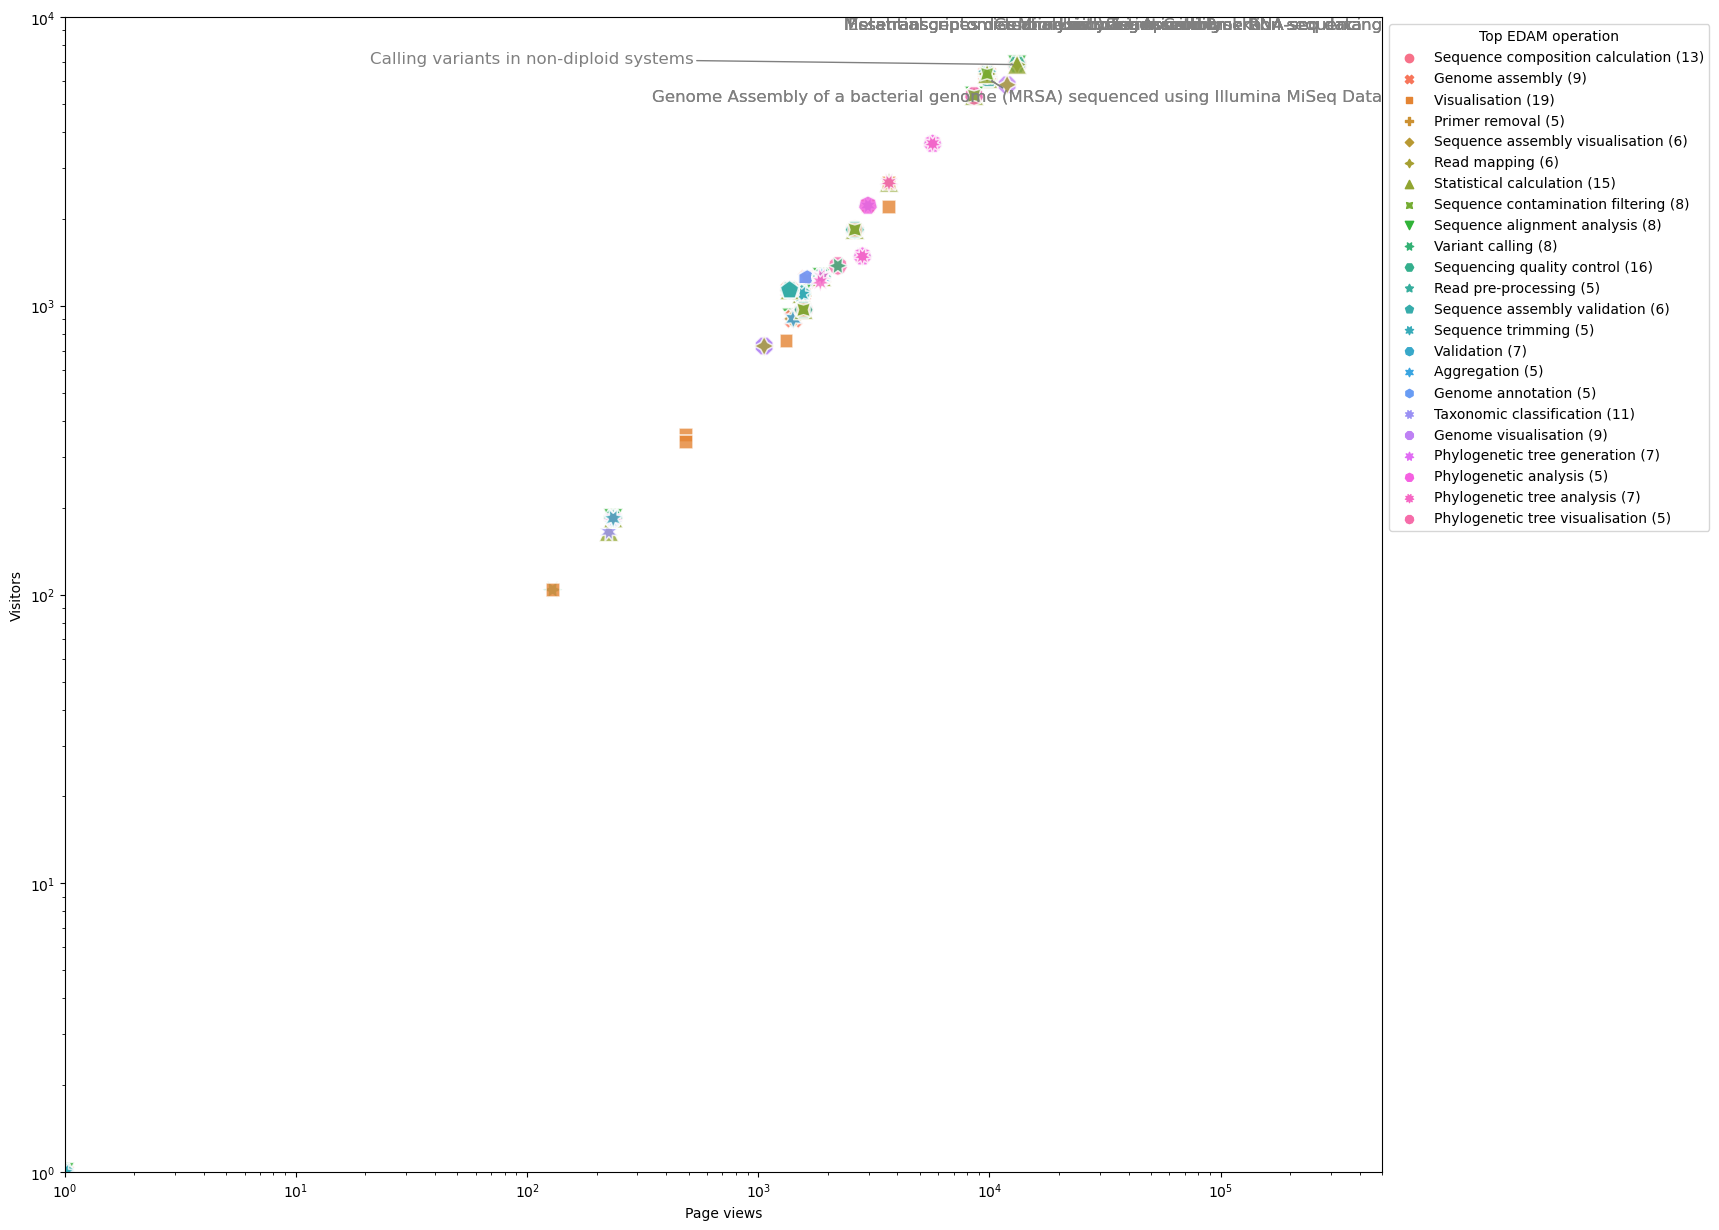

In [97]:
plt.figure(figsize=(17,15))
s = 200
ax = sns.scatterplot(data=df_inflated_mod1_operation, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM operation single",
                alpha=0.8,
                style="EDAM operation single",
                s=s)

ax2 = sns.scatterplot(data=df_inflated_mod2_operation, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM operation single",
                alpha=0.2,
                palette=['darkgrey'],
                s=s,
                ax=ax)

# Log scale
plt.xscale('log')
plt.yscale('log')

# Increase limit to show all labels
ax.set(ylim=(1, 10000), xlim=(1,500000))

# Label highest used tools for each group
max_idx = df_inflated_mod1_operation.groupby(["EDAM operation single"])['Page views'].transform("max") == df_inflated_mod1_operation['Page views']
df_inflated_mod_slice = df_inflated_mod1_operation[max_idx]
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Page views']
    y = row['Visitors']
    name = row['Title']
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=12)
    texts.append(t)

adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
value_counts = df_inflated_mod_operation["EDAM operation single"].value_counts()

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("Top EDAM operation")
plt.savefig("../results/top_tutorials_operations.png", bbox_inches='tight')

In [84]:
# Statistics
unique_tutorials = df["Title"].nunique()
unique_operations = df_inflated_operation["EDAM operation single"].nunique()
unique_topics = df_inflated_topics["EDAM topic single"].nunique()

# Tutorial titles by EDAM operation
titles_by_operation = df_inflated_mod_operation.groupby("EDAM operation single")["Title"].unique()

# Tutorial titles by EDAM topic
titles_by_topic = df_inflated_mod_topics.groupby("EDAM topic single")["Title"].unique()

# Print statistics
print(f"Total number of unique tutorials: {unique_tutorials}")
print(f"Total number of unique EDAM operations: {unique_operations}")
print(f"Total number of unique EDAM topics: {unique_topics}")

print("\nTutorial Titles by EDAM Operation:")
for operation, titles in titles_by_operation.items():
    print(f"\n{operation} ({len(titles)} tutorials):")
    for title in titles:
        print(f" - {title}")

print("\nTutorial Titles by EDAM Topic:")
for topic, titles in titles_by_topic.items():
    print(f"\n{topic} ({len(titles)} tutorials):")
    for title in titles:
        print(f" - {title}")

Total number of unique tutorials: 35
Total number of unique EDAM operations: 84
Total number of unique EDAM topics: 24

Tutorial Titles by EDAM Operation:

Other Operation (35 tutorials):
 - Assembly of metagenomic sequencing data
 - Genome Assembly of a bacterial genome (MRSA) sequenced using Illumina MiSeq Data
 - Unicycler Assembly
 - Checking expected species and contamination in bacterial isolate
 - Genome annotation with Prokka
 - Refining Genome Annotations with Apollo (prokaryotes)
 - Comparative gene analysis in unannotated genomes
 - Essential genes detection with Transposon insertion sequencing
 - Making sense of a newly assembled genome
 - Genome Assembly of MRSA from Oxford Nanopore MinION data (and optionally Illumina data)
 - Bacterial Genome Annotation
 - Analyses of metagenomics data - The global picture
 - Pathogen detection from (direct Nanopore) sequencing data using Galaxy - Foodborne Edition
 - Taxonomic Profiling and Visualization of Metagenomic Data
 - Antibioti

# Plot EDAM topics

/tmp/ipykernel_114596/3347999465.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.scatterplot(data=df_inflated_mod2_topic,


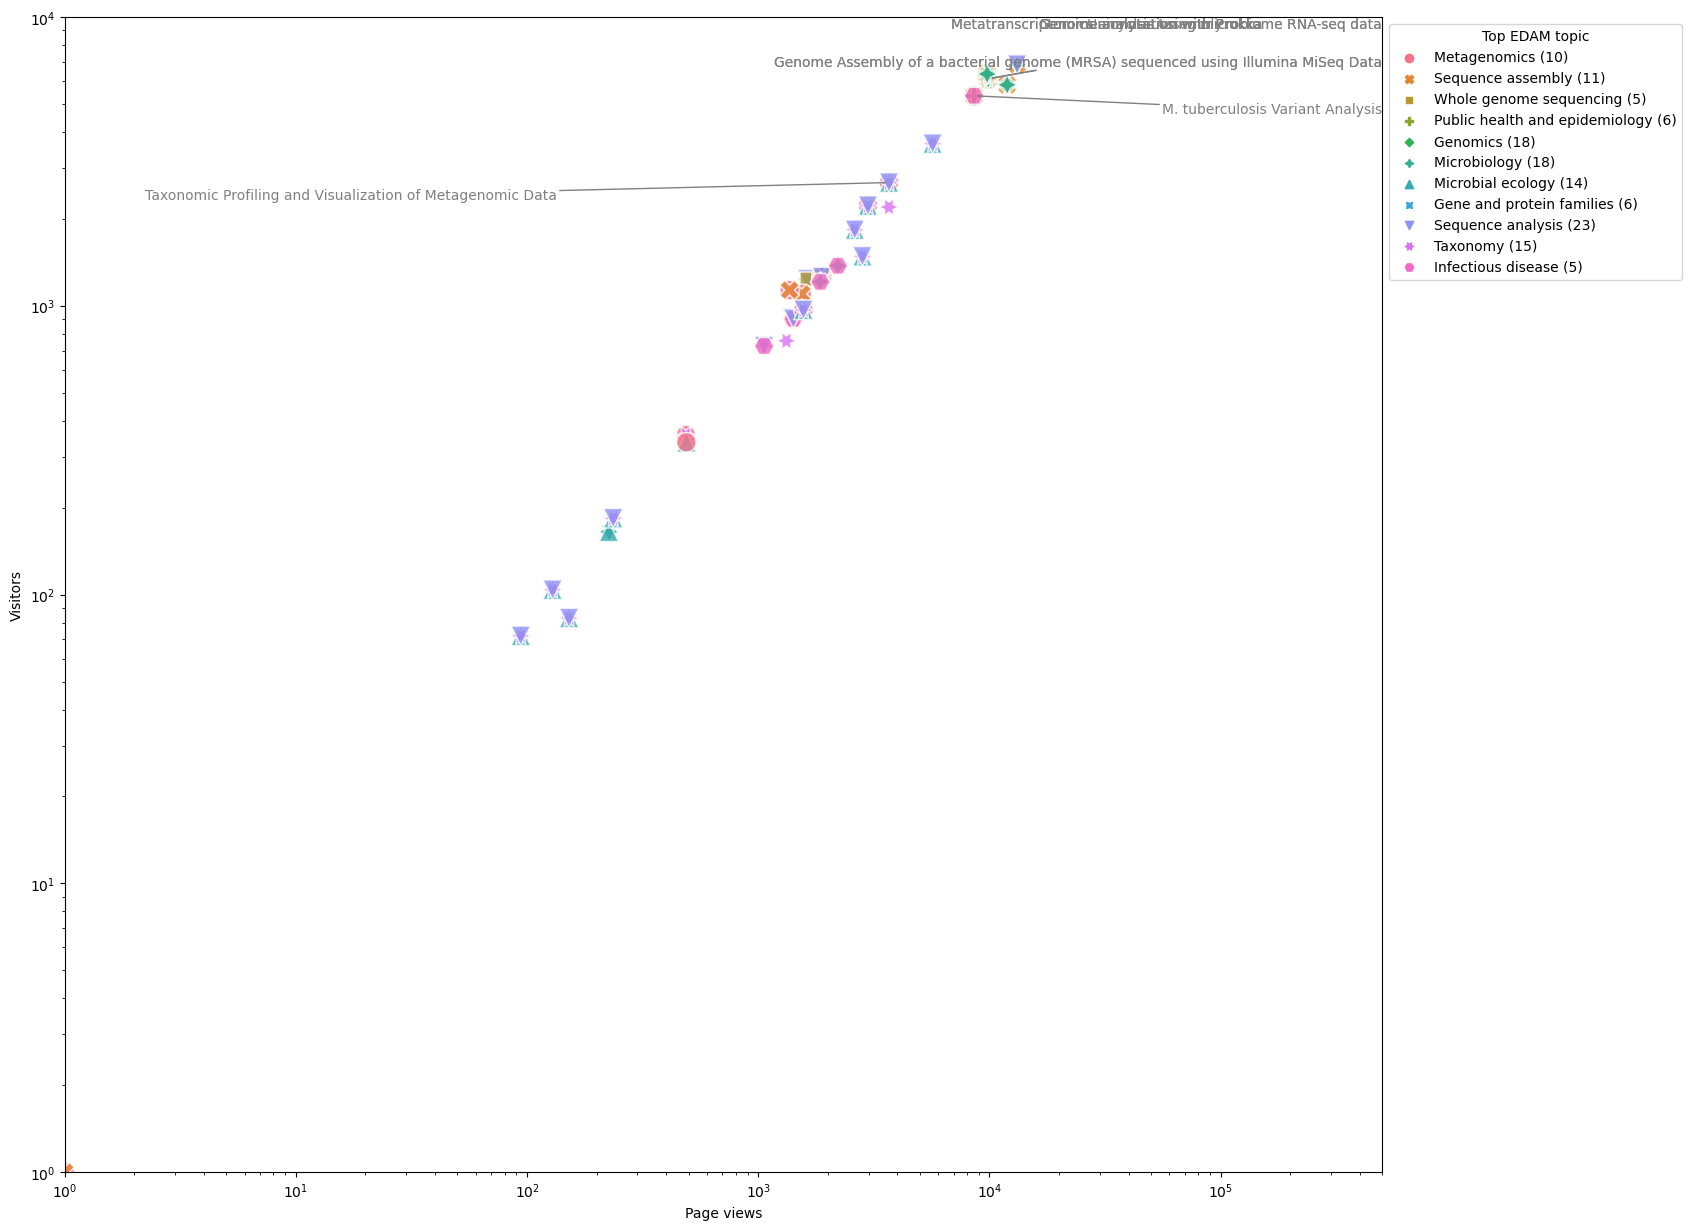

In [98]:
plt.figure(figsize=(17,15))
ax = sns.scatterplot(data=df_inflated_mod1_topic, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM topic single",
                alpha=0.8,
                style="EDAM topic single",
                s=s)

ax2 = sns.scatterplot(data=df_inflated_mod2_topic, 
                x='Page views', 
                y='Visitors', 
                hue="EDAM topic single",
                alpha=0.2,
                palette=['darkgrey','darkgrey'],
                s=s,
                ax=ax)

plt.xscale('log')
plt.yscale('log')
ax.set(ylim=(1, 10000), xlim=(1,500000))
max_idx = df_inflated_mod1_topic.groupby(["EDAM topic single"])['Page views'].transform("max") == df_inflated_mod1_topic['Page views']
df_inflated_mod_slice = df_inflated_mod1_topic[max_idx]
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Page views']
    y = row['Visitors']
    name = row['Title']
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=10)
    texts.append(t)

adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
value_counts = df_inflated_mod_topics["EDAM topic single"].value_counts()

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("Top EDAM topic")
plt.savefig("../results/top_tutorials_topics.png", bbox_inches='tight')

# Read the data


In [3]:
tutorials_df = pd.read_csv(tutorials_url, sep='\t')
tutorials_df.drop_duplicates()
tutorials_df.to_csv('tutorials.csv', index=False)

# Inspect the dataframe

In [4]:
print(tutorials_df.head())
print(tutorials_df.columns)

      Topic                                              Title  \
0  Assembly           Making sense of a newly assembled genome   
1  Assembly            Assembly of metagenomic sequencing data   
2  Assembly  Genome Assembly of a bacterial genome (MRSA) s...   
3  Assembly  Genome Assembly of MRSA from Oxford Nanopore M...   
4  Assembly                                 Unicycler Assembly   

                                                Link  \
0  https://training.galaxyproject.org//topics/ass...   
1  https://training.galaxyproject.org//topics/ass...   
2  https://training.galaxyproject.org//topics/ass...   
3  https://training.galaxyproject.org//topics/ass...   
4  https://training.galaxyproject.org//topics/ass...   

                                          EDAM topic  \
0          Sequence assembly, Genomics, Microbiology   
1                    Metagenomics, Sequence assembly   
2  Sequence assembly, Whole genome sequencing, Pu...   
3  Sequence assembly, Whole genome sequenc

# Summarize the number of tutorials per topic

In [5]:
tutorials_per_topic = tutorials_df.groupby('Topic').size().reset_index(name='Count')

# Plot the number of tutorials per topic

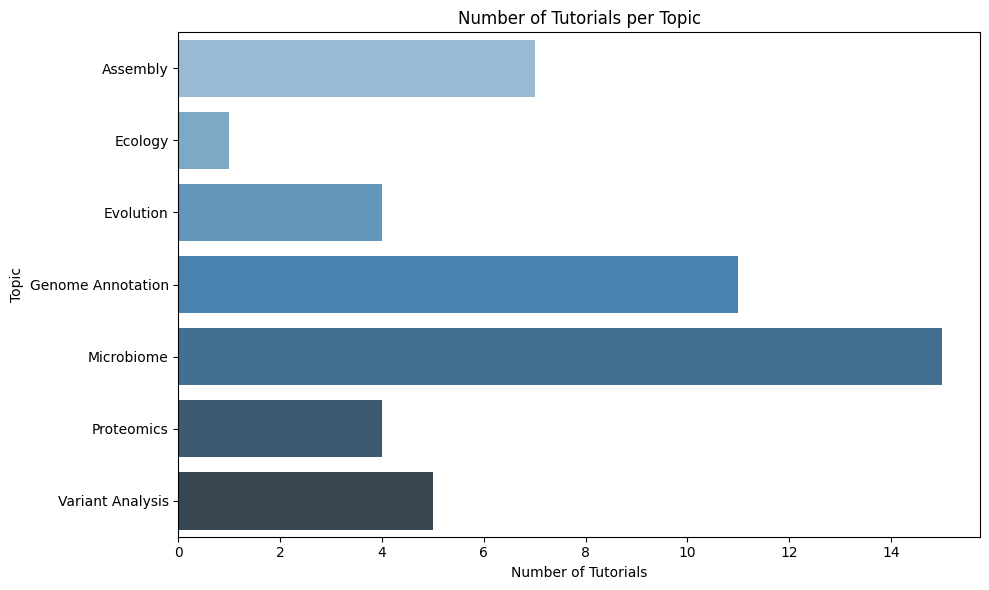

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tutorials_per_topic, x='Count', y='Topic', palette='Blues_d')
plt.title('Number of Tutorials per Topic')
plt.xlabel('Number of Tutorials')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../results/tutorials_per_topic.png")
plt.show()

# Identify the most visited tutorials

In [7]:
most_visited_tutorials = tutorials_df.nlargest(10, 'Page views')

# Plot the most visited tutorials

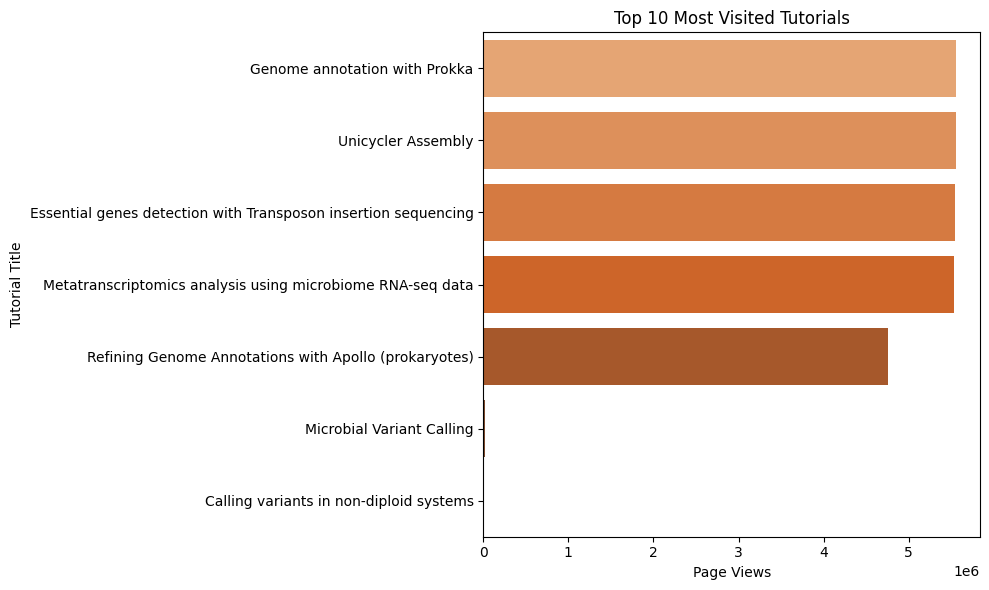

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=most_visited_tutorials, x='Page views', y='Title', palette='Oranges_d')
plt.title('Top 10 Most Visited Tutorials')
plt.xlabel('Page Views')
plt.ylabel('Tutorial Title')
plt.tight_layout()
plt.savefig("../results/most_visited_tutorials.png")
plt.show()

# Summarize video views per topic

In [ ]:
video_views_per_topic = tutorials_df.groupby('Topic')['Video views'].sum().reset_index()

# Plot video views per topic

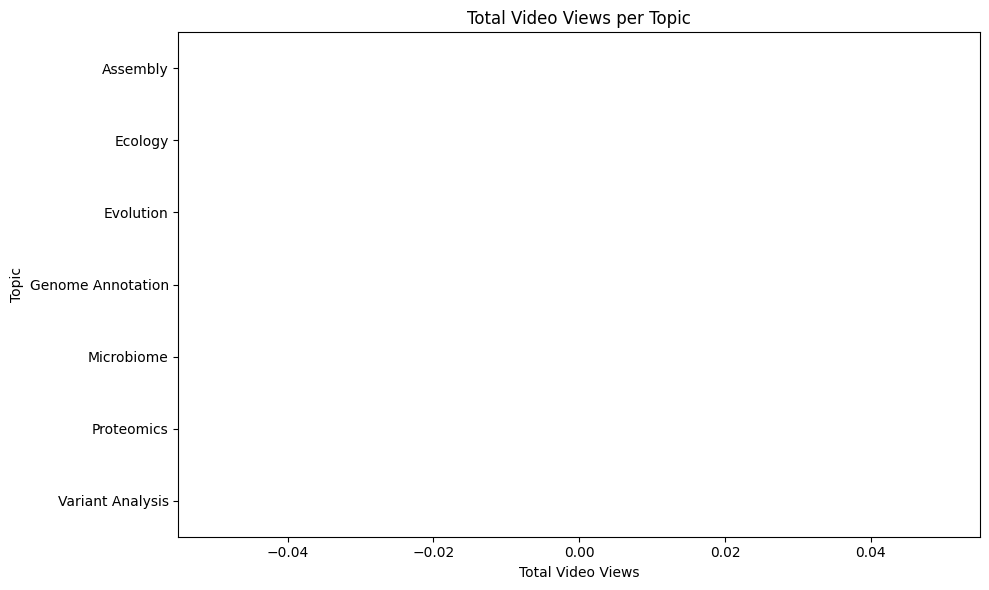

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=video_views_per_topic, x='Video views', y='Topic', palette='Purples_d')
plt.title('Total Video Views per Topic')
plt.xlabel('Total Video Views')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../results/video_views_per_topic.png")
plt.show()

# Average feedback score per topic

In [10]:
avg_feedback_per_topic = tutorials_df.groupby('Topic')['Feedback mean note'].mean().reset_index()

# Plot average feedback score per topic

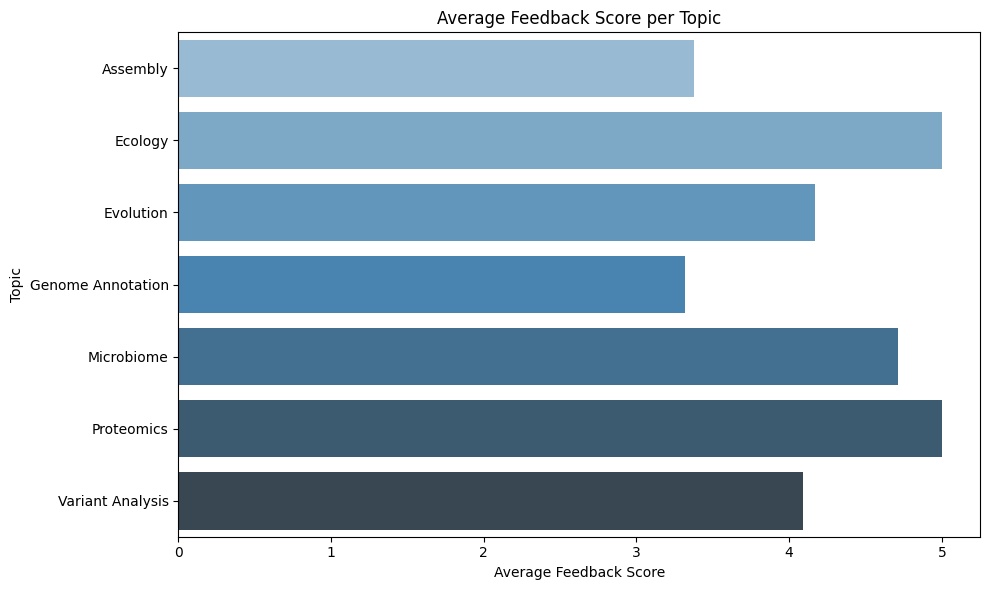

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_feedback_per_topic, x='Feedback mean note', y='Topic', palette='Blues_d')
plt.title('Average Feedback Score per Topic')
plt.xlabel('Average Feedback Score')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../results/avg_feedback_per_topic.png")
plt.show()

# Number of tutorials with workflows per topic

In [12]:
tutorials_with_workflows = tutorials_df[tutorials_df['Workflows'].notna() & (tutorials_df['Workflows'] != '')].groupby('Topic').size().reset_index(name='Count')

# Plot number of tutorials with workflows per topic

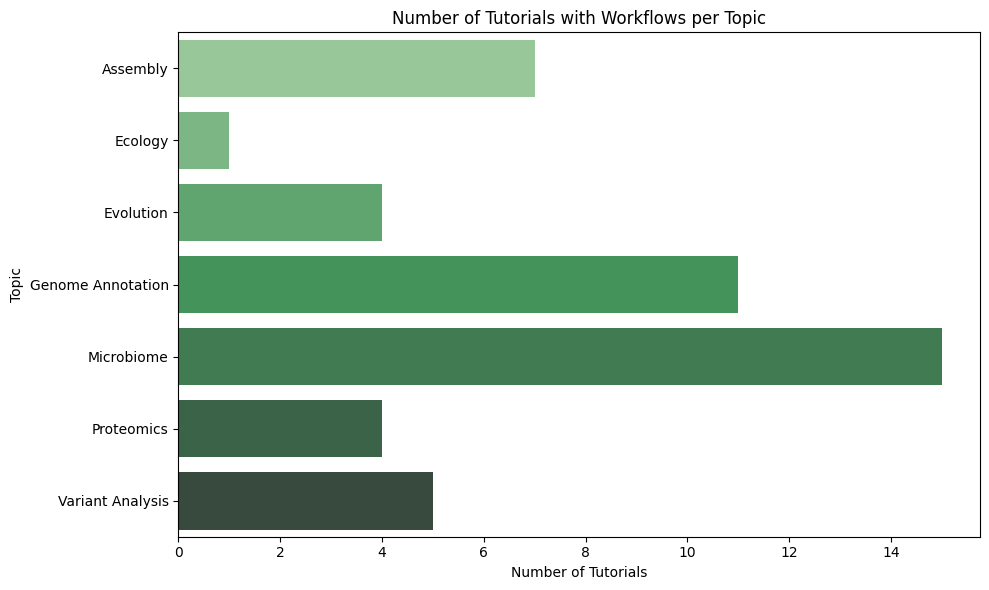

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tutorials_with_workflows, x='Count', y='Topic', palette='Greens_d')
plt.title('Number of Tutorials with Workflows per Topic')
plt.xlabel('Number of Tutorials')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../results/tutorials_with_workflows_per_topic.png")
plt.show()

# Distribution of feedback scores

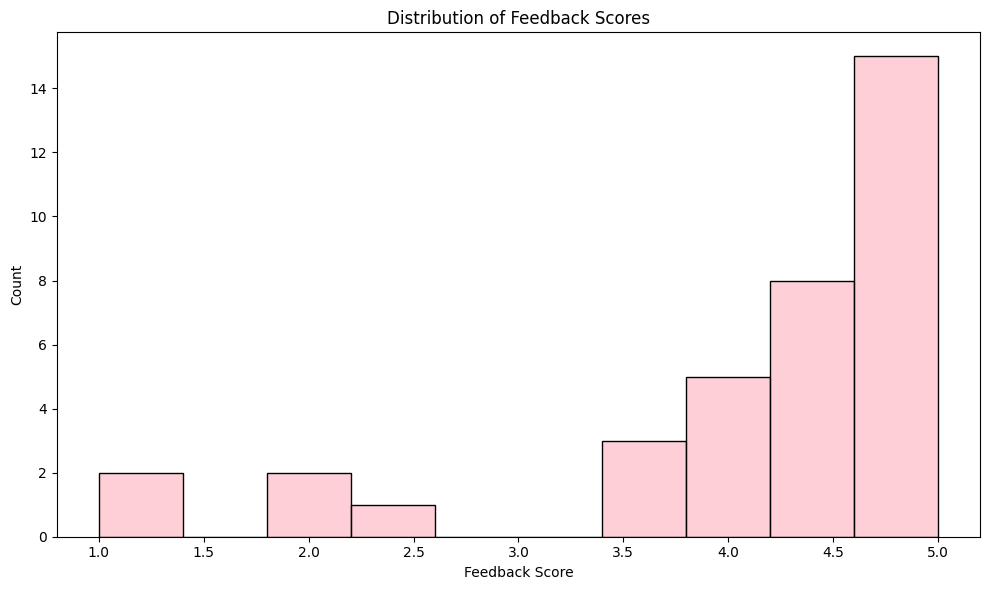

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(tutorials_df['Feedback mean note'], bins=10, kde=False, color='pink')
plt.title('Distribution of Feedback Scores')
plt.xlabel('Feedback Score')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("../results/feedback_score_distribution.png")
plt.show()

# Relationship between feedback score and visitors

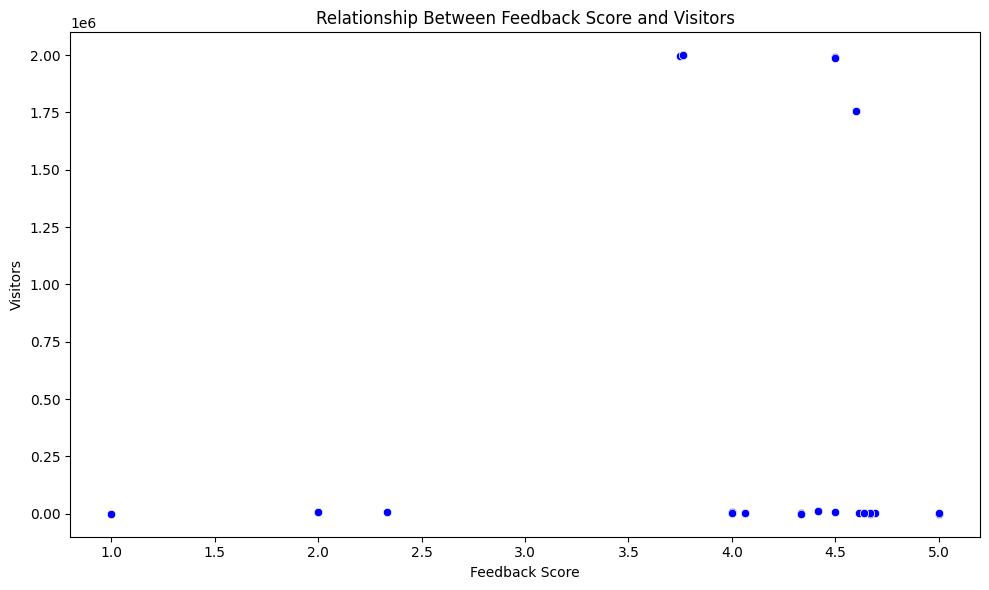

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tutorials_df, x='Feedback mean note', y='Visitors', color='blue')
plt.title('Relationship Between Feedback Score and Visitors')
plt.xlabel('Feedback Score')
plt.ylabel('Visitors')
plt.tight_layout()
plt.savefig("../results/feedback_vs_visitors.png")
plt.show()

# Bar Chart of Tutorial Topics (Total Page Views per Topic)

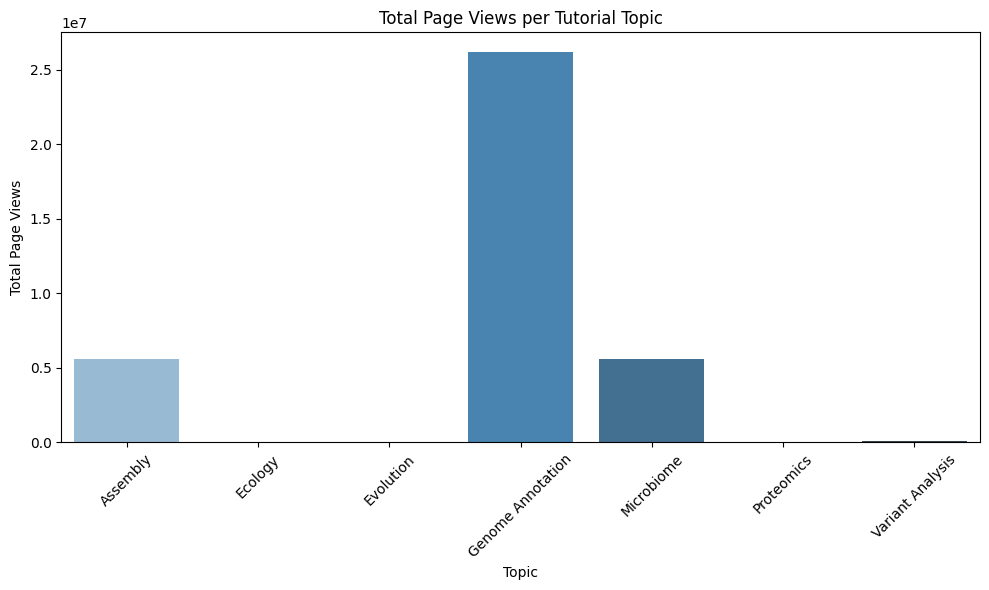

In [14]:
page_views_per_topic = tutorials_df.groupby('Topic')['Page views'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=page_views_per_topic, x='Topic', y='Page views', palette='Blues_d')
plt.title('Total Page Views per Tutorial Topic')
plt.xlabel('Topic')
plt.ylabel('Total Page Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../results/page_views_per_topic.png")
plt.show()

# Stacked Bar Chart of Workflow Components (for simplicity, using number of tutorials with workflows per topic)

<Figure size 1000x600 with 0 Axes>

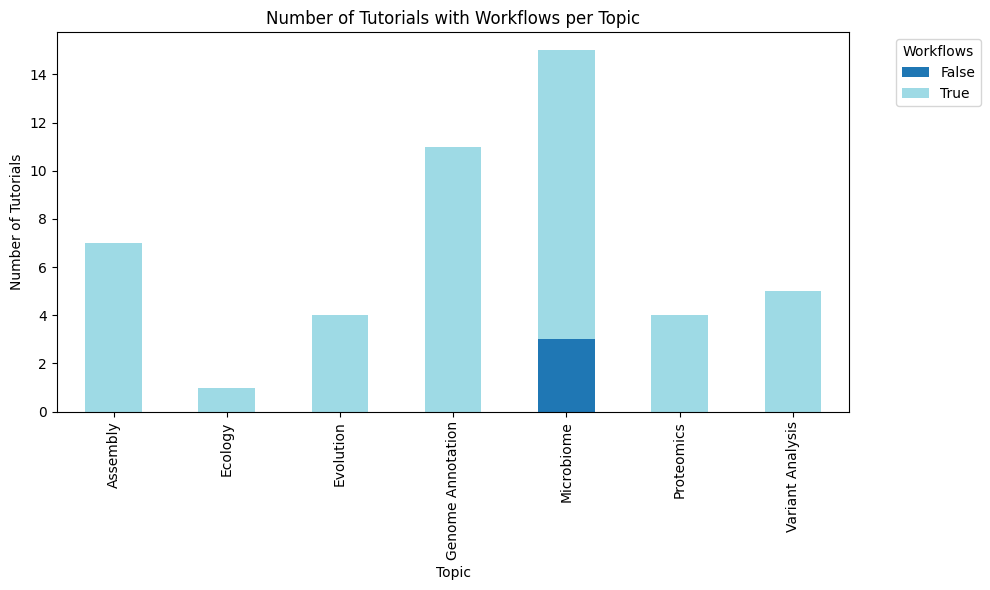

In [55]:
plt.figure(figsize=(10, 6))
tutorials_with_workflows_per_tool = tutorials_df[tutorials_df['Workflows'].notna() & (tutorials_df['Workflows'] != '')].groupby(['Topic', 'Workflows']).size().unstack(fill_value=0)

tutorials_with_workflows_per_tool.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.title('Number of Tutorials with Workflows per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Tutorials')
plt.legend(title='Workflows', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../results/stacked_workflow_components.png")
plt.show()

# Heatmap of Workflow Usage (using the number of tutorials with workflows per topic)

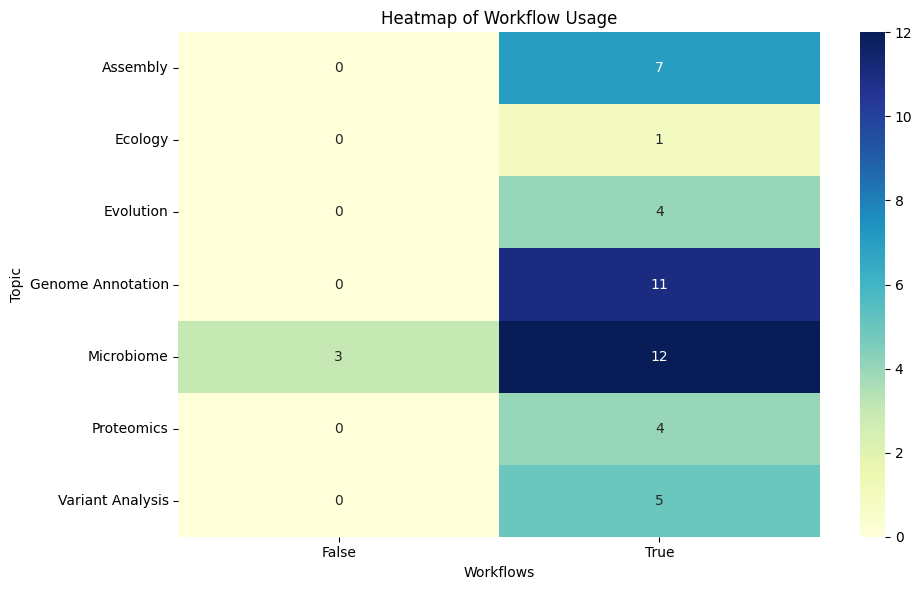

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(tutorials_with_workflows_per_tool, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Heatmap of Workflow Usage')
plt.xlabel('Workflows')
plt.ylabel('Topic')
plt.tight_layout()
plt.savefig("../results/heatmap_workflow_usage.png")
plt.show()